# Introduction to Julia

![julia-logo](./figures/l1_julia-logo.png)

# The team

- Lazaro Alonso (@lazarusA)
  - scientist by day, plotting wizard by night
  - regular on Julia-discord, slack
- Jordi Bolibar (@JordiBolibar)
  - developper of [ODINN.jl](https://github.com/ODINN-SciML/ODINN.jl)
- Mauro Werder (@mauro3)
  - glaciologist by day
  - maintainer of a few Julia packages
  - programming Julia since 2013

# The format

- Material is on GitHub https://github.com/mauro3/Julia-intro-for-geoscience-EGU2024
- We try to make this short course a little interactive and provide a Jupyter Hub
  - this will Jupyter Hub will only run this morning

## In case anyone doesn't know: Jupyter Notebooks

This is a [Jupyter notebook](https://jupyter.org/); a browser-based computational notebook.

Code cells are executed by putting the cursor into the cell and hitting `shift + enter`.  For more
info see the [documentation](https://jupyter-notebook.readthedocs.io/en/stable/).

## The Julia programming language

[Julia](https://julialang.org/) is a modern, interactive, and high performance programming language.  It's a general purpose
language with a bend on technical computing.

![julia-logo](./figures/l1_julia-logo-repl.png)

- first released in 2012
- reached version 1.0 in 2018
- current version 1.10.2 (04.2024)
- thriving community, for instance there are currently around 11000 [packages registered](https://juliahub.com/ui/Packages)

### What does Julia look like

An example solving the Lorenz system of ODEs:

In [1]:
function lorenz(x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ    * (x[2] - x[1]),
     x[1] * (ρ - x[3]) - x[2],
     x[1]*x[2] - β*x[3]]
end

# integrate dx/dt = lorenz(t,x) numerically for 500 steps
dt = 0.01
x₀ = [2.0, 0.0, 0.0]
out = zeros(3, 500)
out[:,1] = x₀
for i=2:size(out,2)
    out[:,i] = out[:,i-1] + lorenz(out[:,i-1]) * dt
end

And its solution plotted

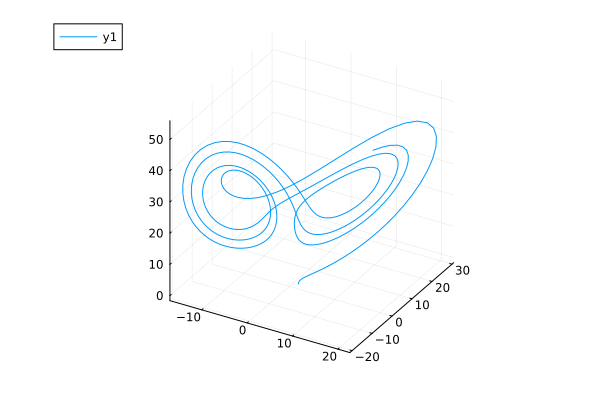

In [2]:
using Plots
plot(out[1,:], out[2,:], out[3,:])

### Julia in brief
Julia 1.0 released 2018, now at version 1.10

Features:
- general purpose language with a focus on technical computing
- dynamic language
- interactive development
- good performance on par with C & Fortran
  - just-ahead-of-time compiled via LLVM
  - No need to vectorise: for loops are fast
- multiple dispatch
- user-defined types are as fast and compact as built-ins
- Lisp-like macros and other metaprogramming facilities
- designed for parallelism and distributed computation
- good inter-op with other languages

### The two language problem

**One language to prototype   --  one language for production**
- example from a co-worker: prototype in Matlab, production in CUDA-C

**One language for the users  --  one language for under-the-hood**
- Numpy (python -- C)
- machine-learning: pytorch, tensorflow

![](./figures/l1_ml.png)

### The two language problem

Prototype/interface language:
- easy to learn and use
- interactive
- productive
- --> *but slow*
- Examples: Python, Matlab, R, IDL...

Production/fast language:
- fast
- --> *but* complicated/verbose/not-interactive/etc
- Examples: C, C++, Fortran, Java...

###  Julia solves the two-language problem (mostly)

Julia is:
- easy to learn and use
- interactive
- productive

and also:
- fast

![](./figures/l1_flux-vs-tensorflow.png)

###  Let's get our hands dirty!

Fire up your JupyterHub:
- go to TODO
- log in with a username and password of your choice
- -> if it does not work than someone took that username already (or the server crashed)

You should find three Jupyter notebooks:
- `julia-basics.jl`  -- this very notebook
- `geo-ecosystem.ipynb` -- intro to geo-data processing and visualisation
- `diff-eqs.ipynb` -- intro to solving and inverting ordinary differential equations

Note that they are all on GitHub, on the repo for this short course:
[github.com/mauro3/Julia-intro-for-geoscience-EGU2024](https://github.com/mauro3/Julia-intro-for-geoscience-EGU2024)

- -> there are also solution notebooks provided there!

###  Let's get our hands dirty!

We will now look at
- variables and types
- control flow
- functions
- modules and packages

The documentation of Julia is good and can be found at [https://docs.julialang.org](https://docs.julialang.org); although for learning it might be a bit terse...

There are also tutorials, see [https://julialang.org/learning/](https://julialang.org/learning/).

Furthermore, documentation can be gotten with `?xyz`.  Try it (in Jupyter notebooks this needs to be in a cell of its own):

In [3]:
# ?cos

## Variables, assignments, and types [5min]
[https://docs.julialang.org/en/v1/manual/variables/](https://docs.julialang.org/en/v1/manual/variables/)

In [4]:
a = 4
b = "a string"
c = b # now b and c bind to the same value

"a string"

Conventions:
- variables are (usually) lowercase, words can be separated by `_`
- function names are lowercase
- modules, packages and types are in CamelCase

### Variables: Unicode
From [https://docs.julialang.org/en/v1/manual/variables/](https://docs.julialang.org/en/v1/manual/variables/):

Unicode names (in UTF-8 encoding) are allowed and typed in LaTeX notation.  Try making a variable
- `δ = 99` with `\delta`+tab
- `x² = 25` with `x\^2`+tab

In [5]:
δ = 99
x² = 25

25

### Basic datatypes
- numbers (Ints, Floats, Complex, etc.)
- strings
- tuples
- arrays
- dictionaries

In [6]:
1     # 64 bit integer (or 32 bit if on a 32-bit OS)
1.5   # Float64
1//2  # Rational

1//2

In [7]:
typeof(1.5)

Float64

In [8]:
"a string", (1, 3.5) # and tuple

("a string", (1, 3.5))

In [9]:
[1, 2, 3,] # array of eltype Int

3-element Vector{Int64}:
 1
 2
 3

In [10]:
Dict("a"=>1, "b"=>cos)

Dict{String, Any} with 2 entries:
  "b" => cos
  "a" => 1

## Array exercises [3min]

Arrays are the bread and butter of science...

- indexing starts at 1
- uses `[]`

Task: assign vectors to `a`, and `b` and the concatenate them using `;`:

In [11]:
a = [2, 3]
b = [4, 5]
[a ; b]

4-element Vector{Int64}:
 2
 3
 4
 5

Add new elements to the end of Vector `b` (hint look up the documentation for `push!`)

In [12]:
push!(b, 1)
push!(b, 3, 4)

5-element Vector{Int64}:
 4
 5
 1
 3
 4

### Array exercise: indexing

Access element `[1,2]` and `[2,1]` of Matrix `a` (hint use []):

In [13]:
a = rand(3,4)
a[1,2], a[2,1]

(0.8638253767167042, 0.7737274517342521)

Linear vs Cartesian indexing,
access the first element:

In [14]:
a[1]
a[1,1]

0.04029970185941145

Access the last element (look up `?end`) both with linear and Cartesian indices

In [15]:
a[end]
a[end, end]

0.5576772087429022

### Array exercise: indexing by ranges

Access the last row of `a` (hint use `1:end`)

In [16]:
a[end, 1:end]

4-element Vector{Float64}:
 0.9833512255768048
 0.5809303564328938
 0.24839543983039303
 0.5576772087429022

Access a 2x2 sub-matrix

In [17]:
a[1:2, 1:2]

2×2 Matrix{Float64}:
 0.0402997  0.863825
 0.773727   0.99814

################################################################

### A small detour: types

All values have types.  Arrays store in their type what type the elements can be.

> Arrays which have concrete element-types are more performant!

In [18]:
typeof([1, 2]), typeof([1.0, 2.0])

(Vector{Int64}, Vector{Float64})

Aside, they also store their dimension in the second parameter.

The type can be specified at creation

In [19]:
String["one", "two"]

2-element Vector{String}:
 "one"
 "two"

Create an array taking `Int` with no elements.  Push `1`, `1.0` and `1.5` to it.  What happens?

In [20]:
a = Int[]
push!(a, 1) ## works
push!(a, 1.0) ## works

2-element Vector{Int64}:
 1
 1

push!(a, 1.5) ## would error as 1.5 cannot be converted to an Int

Make an array of type `Any` (which can store any value).  Push a value of type
Int and one of type String to it.

In [21]:
a = []
push!(a, 5)
push!(a, "a")

2-element Vector{Any}:
 5
  "a"

## Control flow

Julia provides a variety of [control flow constructs](https://docs.julialang.org/en/v1/manual/control-flow/), of which we look at:

  * [Conditional Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation): `if`-`elseif`-`else` and `?:` (ternary operator).
  * [Short-Circuit Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation): logical operators `&&` (“and”) and `||` (“or”), and also chained comparisons.
  * [Repeated Evaluation: Loops](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops): `while` and `for`.

### Conditional evaluation
[https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation)

if-blocks

In [22]:
a = 77
if a==45
    println("Hi")
elseif a==77
    println("Hello")
else
    println("Grüss Gott")
end

Hello


### Conditional evaluation: the "ternary operator" `?`

In [23]:
a = 1
a > 5 ? "really big" : "not so big"

"not so big"

### Short circuit operators `&&` and `||`

[https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation)

Relatively often used in Julia:
```
a < 0 && error("Not valid input for `a`")
```

### Loops: `for` and `while`

[https://docs.julialang.org/en/v1/manual/control-flow/#man-loops](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops)

In [24]:
for i = 1:3
    println(i)
end

for i in ["dog", "cat"] ## `in` and `=` are equivalent for writing loops
    println(i)
end

i = 1
while i<4
    println(i)
    i += 1
end

1
2
3
dog
cat
1
2
3


## Functions

Functions can be defined in Julia in a number of ways.  In particular there is one variant
more suited to longer definitions, and one for one-liners:

```
function f(a, b)
   return a * b
end
f(a, b) = a * b
```

Defining many, short functions is typical in good Julia code.

See [https://docs.julialang.org/en/v1/manual/functions/](https://docs.julialang.org/en/v1/manual/functions/)

### Functions: exercises [5min]

Define a function `fn` in long-form which takes two arguments and multiplies them

In [25]:
function fn(a, b)
    return a*b
end

# it should pass this thest
a, b = rand(4,5), 7
@assert fn(a,b) == a*b

### Functions: dot-syntax *IMPORTANT*

Functions which are scalar functions in maths, say `cos`, are only defined for scalars in Julia!

To apply them element-wise to vectors use `cos.([1,2])`.

Similarly the dot also works for infix functions, say `.+`.

Exercise: apply the `sin` function to a vector `1:10` and add `7`:

In [26]:
sin.(1:10) .+ 7

10-element Vector{Float64}:
 7.841470984807897
 7.909297426825682
 7.141120008059867
 6.243197504692072
 6.041075725336862
 6.720584501801074
 7.656986598718789
 7.9893582466233815
 7.4121184852417565
 6.4559788891106304

Broadcasting will extend row and column vectors into a matrix.
Try `(1:10) .+ (1:10)'`  (Note the `'`, this is the transpose operator)

In [27]:
(1:10) .+ (1:10)'

10×10 Matrix{Int64}:
  2   3   4   5   6   7   8   9  10  11
  3   4   5   6   7   8   9  10  11  12
  4   5   6   7   8   9  10  11  12  13
  5   6   7   8   9  10  11  12  13  14
  6   7   8   9  10  11  12  13  14  15
  7   8   9  10  11  12  13  14  15  16
  8   9  10  11  12  13  14  15  16  17
  9  10  11  12  13  14  15  16  17  18
 10  11  12  13  14  15  16  17  18  19
 11  12  13  14  15  16  17  18  19  20

### Functions: dot-syntax exercise

Evaluate the function `sin(x) + cos(y)` for
`x = 0:0.1:pi` and `y = -pi:0.1:pi`.  Remember to use `'`.

In [28]:
x,y = 0:0.1:pi, -pi:0.1:pi
sin.(x) .+ cos.(y')

32×63 Matrix{Float64}:
 -1.0       -0.995004  -0.980067  …  -0.96017   -0.983268  -0.996542
 -0.900167  -0.895171  -0.880233     -0.860337  -0.883435  -0.896709
 -0.801331  -0.796335  -0.781397     -0.761501  -0.784599  -0.797873
 -0.70448   -0.699484  -0.684546     -0.66465   -0.687748  -0.701022
 -0.610582  -0.605586  -0.590648     -0.570752  -0.59385   -0.607124
 -0.520574  -0.515579  -0.500641  …  -0.480745  -0.503843  -0.517117
 -0.435358  -0.430362  -0.415424     -0.395528  -0.418626  -0.4319
 -0.355782  -0.350786  -0.335849     -0.315953  -0.339051  -0.352324
 -0.282644  -0.277648  -0.26271      -0.242814  -0.265912  -0.279186
 -0.216673  -0.211677  -0.19674      -0.176843  -0.199942  -0.213215
  ⋮                               ⋱   ⋮                    
 -0.254295  -0.249299  -0.234361     -0.214465  -0.237563  -0.250837
 -0.324537  -0.319541  -0.304603     -0.284707  -0.307805  -0.321079
 -0.401528  -0.396532  -0.381594  …  -0.361698  -0.384796  -0.39807
 -0.484499  -0.479503  

### Functions: anonymous functions

So far our function got a name with the definition. They can also be defined without name.

See [https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions](https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions)

In [29]:
map(x -> sin(x) + cos(x), 1:10)

10-element Vector{Float64}:
  1.3817732906760363
  0.4931505902785393
 -0.8488724885405782
 -1.4104461161715403
 -0.6752620891999122
  0.6807547884514401
  1.4108888530620938
  0.8438582128147682
 -0.49901177664292035
 -1.383092639965822

### Key feature: multiple dispatch functions

- Julia is not an object oriented language

OO:
- methods belong to objects
- method is selected based on first argument (e.g. `self` in Python)

Multiple dispatch:
- methods are separate from objects
- are selected based on all arguments
- similar to overloading but method selection occurs at runtime and not compile-time (see also video below)
> very natural for mathematical programming

JuliaCon 2019 presentation on the subject by Stefan Karpinski
(co-creator of Julia):

["The Unreasonable Effectiveness of Multiple Dispatch"](https://www.youtube.com/watch?v=kc9HwsxE1OY)

## Functions: Multiple dispatch demo

In [30]:
struct Rock end
struct Paper end
struct Scissors end
### of course structs could have fields as well
# struct Rock
#     color
#     name::String
#     density::Float64
# end

# define multi-method
play(::Rock, ::Paper) = "Paper wins"
play(::Rock, ::Scissors) = "Rock wins"
play(::Scissors, ::Paper) = "Scissors wins"
play(a, b) = play(b, a) # commutative

play(Scissors(), Rock())

"Rock wins"

### Multiple dispatch demo
Can easily be extended later

with new type:

In [31]:
struct Pond end
play(::Rock, ::Pond) = "Pond wins"
play(::Paper, ::Pond) = "Paper wins"
play(::Scissors, ::Pond) = "Pond wins"

play(Scissors(), Pond())

"Pond wins"

with new function:

In [32]:
combine(::Rock, ::Paper) = "Paperweight"
combine(::Paper, ::Scissors) = "Two pieces of papers"
# ...

combine(Rock(), Paper())

"Paperweight"

*Multiple dispatch makes Julia packages very composable!*

This is a key characteristic of the Julia package ecosystem.

## Modules and packages

Modules can be used to structure code into larger entities, and be used to divide it into
different name spaces.  We will not make much use of those, but if interested see
[https://docs.julialang.org/en/v1/manual/modules/](https://docs.julialang.org/en/v1/manual/modules/)

**Packages** are the way people distribute code and we'll make use of them extensively.
In the first example, the Lorenz ODE, you saw
```
using Plots
```
This statement loads the package `Plots` and makes its functions
and types available in the current session and use it like so:

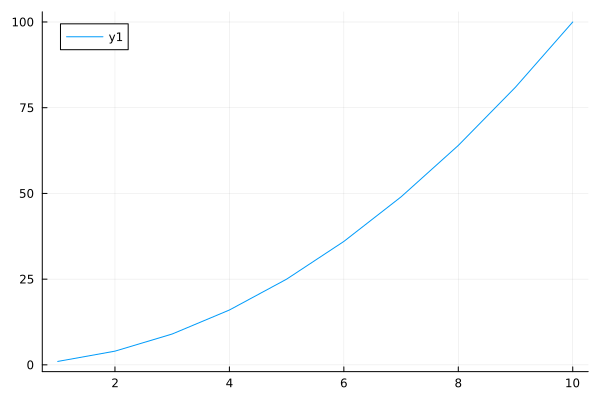

In [33]:
using Plots
plot( (1:10).^2 )

### Packages

All public Julia packages are listed on [https://juliahub.com/ui/Packages](https://juliahub.com/ui/Packages).

You can install a package, say [`UnPack`](https://github.com/mauro3/UnPack.jl) by
```julia-repl
using Pkg
Pkg.add("UnPack")
using UnPack
```

In the REPL, there is also a package-mode (hit `]`) which is for interactive use.

In [34]:
# Install a package the UnPack.jl package
# use it, query help on the package itself:

using Pkg
Pkg.add("UnPack")
using UnPack

   Resolving package versions...
  No Changes to `~/teaching/short-courses-and-talks/EGU2024-Julia-Intro/Julia-intro-for-geoscience-EGU2024/Project.toml`
  No Changes to `~/teaching/short-courses-and-talks/EGU2024-Julia-Intro/Julia-intro-for-geoscience-EGU2024/Manifest.toml`


In [35]:
#?UnPack

### Packages of this short course

This short course uses a few packages, you can see them in the
[Project.toml](https://github.com/mauro3/Julia-intro-for-geoscience-EGU2024/blob/main/Project.toml) of the repo.
Consult the README of https://github.com/mauro3/Julia-intro-for-geoscience-EGU2024 for how to install them on your local machine.

## This concludes the rapid Julia intro

There are many more features of Julia for sure but this should get you started, and setup for
the exercises.  (Let us know if you feel we left something out which would have been helpful for the exercises).

Remember you can self-help with:
- using `?` at the notebook.  Similarly there is an `apropos` function.
- the docs are your friend [https://docs.julialang.org/en/v1/](https://docs.julialang.org/en/v1/)